In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
#import comsol data

location = './'
fileName = 'AF_300freqs_18pos.txt'

df_comsol = pd.DataFrame()

df_comsol['frequency'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 3)
df_comsol['posX'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 0)
df_comsol['posY'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 1)
df_comsol['posZ'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 2)
df_comsol['afEx'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 4)
df_comsol['afEnorm'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 5)

df_comsol

,frequency,posX,posY,posZ,afEx,afEnorm
0,50.000000,-0.15,-0.20,0.1,16.709406,24.057827
1,50.836120,-0.15,-0.20,0.1,16.709406,24.057827
2,51.672241,-0.15,-0.20,0.1,16.709406,24.057827
3,52.508361,-0.15,-0.20,0.1,16.709406,24.057827
4,53.344482,-0.15,-0.20,0.1,16.709406,24.057827
...,...,...,...,...,...,...
5395,296.655518,0.65,0.35,0.1,15.442540,17.645097
5396,297.491639,0.65,0.35,0.1,23.252489,26.383742
5397,298.327759,0.65,0.35,0.1,18.145146,22.300513
5398,299.163880,0.65,0.35,0.1,20.897906,25.558058


In [117]:
#import manufacturer data

manFreqs, manAF = np.loadtxt(location + 'comPowerAF10m.txt',
                                delimiter = ',',
                                unpack = True)

#import center of room comsol run

fileName = 'AF_25freqs_center.txt'

df_comsol_center = pd.DataFrame()

df_comsol_center['frequency'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 0)
df_comsol_center['afEx'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 1)
df_comsol_center['afEnorm'] = np.loadtxt(location + fileName, 
                                skiprows = 5, 
                                usecols = 2)

#import comsol freespace dipole
af_freespace_comsol= np.loadtxt(location + 'AF_freespace_comsol.txt',
                                skiprows = 5, 
                                usecols = 1)

freqs_freespace_comsol= np.loadtxt(location + 'AF_freespace_comsol.txt',
                                skiprows = 5, 
                                usecols = 0)

#import comsol bicon freespace

afBicon_freespace_comsol= np.loadtxt(location + 'biconComsol.txt',
                                skiprows = 5, 
                                usecols = 1)

freqsBicon_freespace_comsol= np.loadtxt(location + 'biconComsol.txt',
                                skiprows = 5, 
                                usecols = 0)

In [118]:
df_comsol.groupby('frequency').median().head()

,posX,posY,posZ,afEx,afEnorm
frequency,,,,,
50.000000,0.3,0.075,0.1,16.697672,24.004042
50.836120,0.3,0.075,0.1,16.697672,24.004042
51.672241,0.3,0.075,0.1,16.697672,24.004042
52.508361,0.3,0.075,0.1,16.697672,24.004042
53.344482,0.3,0.075,0.1,16.697672,24.004042


In [134]:
#this is the wrong way to get freqs array
freqs = np.asarray(df_comsol['frequency'])[:300]

avgAfEx_arr = np.asarray(df_comsol.groupby('frequency').median()['afEx'])
avgAfEnorm_arr = np.asarray(df_comsol.groupby('frequency').median()['afEnorm'])


AfExOffcenter_onePos_arr = np.asarray(df_comsol['afEx'])[:300]


AfExCenter_arr = np.asarray(df_comsol_center['afEx'])
freqsExCenter_arr = np.asarray(df_comsol_center['frequency'])

In [143]:
df_comsol.groupby('frequency').mean()

,posX,posY,posZ,afEx,afEnorm
frequency,,,,,
50.000000,0.266667,0.075,0.3,16.695858,23.780902
50.836120,0.266667,0.075,0.3,16.695858,23.780902
51.672241,0.266667,0.075,0.3,16.695858,23.780902
52.508361,0.266667,0.075,0.3,16.695858,23.780902
53.344482,0.266667,0.075,0.3,16.695858,23.780902
...,...,...,...,...,...
296.655518,0.266667,0.075,0.3,15.233553,18.786300
297.491639,0.266667,0.075,0.3,20.270607,24.645142
298.327759,0.266667,0.075,0.3,18.180807,22.879332


In [144]:
df_comsol.groupby('frequency').median()

,posX,posY,posZ,afEx,afEnorm
frequency,,,,,
50.000000,0.3,0.075,0.1,16.697672,24.004042
50.836120,0.3,0.075,0.1,16.697672,24.004042
51.672241,0.3,0.075,0.1,16.697672,24.004042
52.508361,0.3,0.075,0.1,16.697672,24.004042
53.344482,0.3,0.075,0.1,16.697672,24.004042
...,...,...,...,...,...
296.655518,0.3,0.075,0.1,14.677244,17.750745
297.491639,0.3,0.075,0.1,20.390374,24.643271
298.327759,0.3,0.075,0.1,15.807216,21.048852


In [126]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

In [158]:
%matplotlib qt

'''
plt.plot(manFreqs[8:], 
         manAF[8:], 
         '--',
         label = 'Free Space (Manufacturer)',
         linewidth = 3)
'''


'''
plt.plot(freqsBicon_freespace_comsol[4:], 
         (2*afBicon_freespace_comsol + 5.6)[4:],
         '--',
         label = 'Free Space (Simulated)', 
         linewidth=3)'''

plt.plot(freqs, avgAfEx_arr , 
         label = 'Move Dipole ', 
         linewidth = 3)

plt.plot(freqsExCenter_arr, 
         AfExCenter_arr , 
         label = 'Dipole Center of Room', 
         linewidth = 3)

plt.plot(freqs_freespace_comsol[4:], 
         (af_freespace_comsol + 5.6)[4:],
         '--',
         label = 'Dipole Free Space', 
         linewidth=3)

plt.legend()
plt.xlabel('Frequency (MHz)', fontweight = 'bold')
plt.ylabel('Antenna Factor (dB/m)', fontweight = 'bold')


Text(0, 0.5, 'Antenna Factor (dB/m)')

In [152]:
%matplotlib qt

plt.plot(manFreqs[8:], 
         manAF[8:], 
         label = 'Free Space (Manufacturer)',
         linewidth = 3)


plt.plot(freqsBicon_freespace_comsol[4:], 
         (2*afBicon_freespace_comsol + 5.6)[4:],
         label = 'Free Space (Simulated)', 
         linewidth=3)



plt.legend()
plt.xlabel('Frequency (MHz)', fontweight = 'bold')
plt.ylabel('Antenna Factor (dB/m)', fontweight = 'bold')

Text(0, 0.5, 'Antenna Factor (dB/m)')

In [149]:
%matplotlib qt

'''
plt.plot(freqs_freespace_comsol[4:], 
         (af_freespace_comsol + 5.6)[4:],
         '--',
         label = 'Free Space (Simulated)', 
         linewidth=3)
'''

plt.plot(freqs, avgAfEx_arr, 
         label = 'AVG Ex', 
         linewidth = 3)
'''
plt.plot(freqs, avgAfEnorm_arr, 
         label = 'AVG norm ', 
         linewidth = 3)'''


plt.plot(freqs,AfExOffcenter_onePos_arr, 
         label = 'onePos ', 
         linewidth = 3)

'''
plt.plot(freqs,AfExCenter_arr, 
         label = 'center ', 
         linewidth = 3)
'''

plt.legend()
plt.xlabel('Frequency (MHz)', fontweight = 'bold')
plt.ylabel('Antenna Factor (dB/m)', fontweight = 'bold')

Text(0, 0.5, 'Antenna Factor (dB/m)')

In [47]:
df_comsol['frequency']

0       50.000000
1       60.416667
2       70.833333
3       81.250000
4       91.666667
          ...    
195    258.333333
196    268.750000
197    279.166667
198    289.583333
199    300.000000
Name: frequency, Length: 200, dtype: float64

In [34]:
df_comsol.groupby('frequency')['frequency']

<AxesSubplot:xlabel='frequency'>

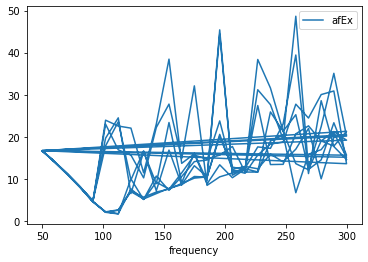

In [43]:
df_comsol.plot('frequency', 'afEx')